# Sparse BNN

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys

module_path = os.path.abspath(os.path.join('../')) # or the path
sys.path.append(module_path)


import itertools
import pandas as pd
import numpy as np

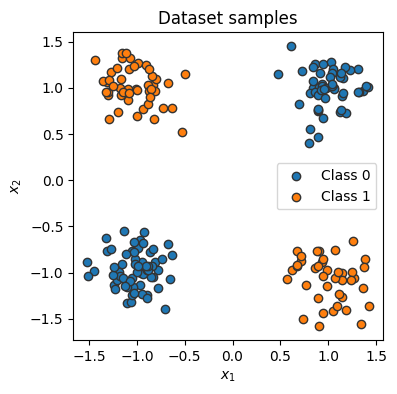

In [15]:
# prepare two-moon data
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import torch

N = 200
nin = 2
data = torch.randint(low=0, high=2, size=(N, nin), dtype=torch.float32)
# To make it slightly more challenging, we add a bit of gaussian noise to the data points.
label = (data.sum(dim=1) == 1).to(torch.long)
data = 2*data-1
data += 0.2 * torch.randn(data.shape)

def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

visualize_samples(data, label)
plt.show()

52.0


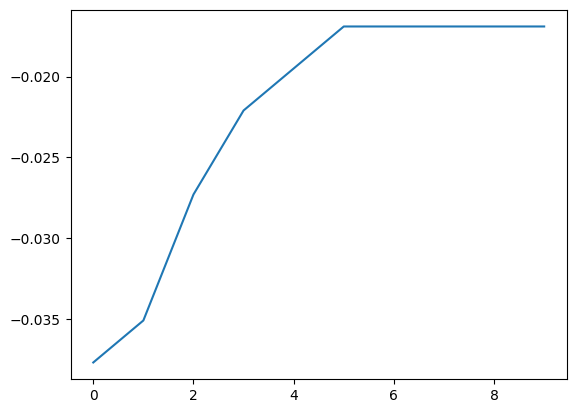

In [96]:
# Define loss function and optimizer
import torch
import torch.nn as nn
import torch.optim as optim

from bnn import SparseBNNLayer

nin = 2
nhid = 2
nout = 1

model = SparseBNNLayer(nin,nhid,nout)


criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

data = data.float()
label = label.float().flatten()

loss_arry = []
# Train the classifier
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(data)
    #loss = criterion(outputs, label)
    loss = torch.mean(-outputs*(2*label-1))
    loss_arry.append(loss.clone().detach())
    loss.backward()
    optimizer.step()
plt.plot(loss_arry)

t1 = outputs.flatten().detach().numpy()
t2 = (2*label-1).detach().numpy()
print(np.mean(t1==t2)*100)